Regression2

Questions
Consignes : Les 4 modèles de machine learning à entrainer sont : la régression logistique, le KNN, le Random Forest et la machine à vecteurs de support (SVM).
1.	Faire une analyse exploratoire des données (10 pts).


In [8]:
import pandas as pd

In [25]:
data = pd.read_csv('https://raw.githubusercontent.com/pefura/IFPERA/main/cohort_TB_death.csv', sep = ',')

In [26]:
data.head(13)

,GENDER,AGE,weight,TB_FORM,VIH,TYPEPATI,HOSPINIT,FOLLOW_UP_DURATION,status,status_rec
0,1,65,missing,2,2,1,2.0,30,2,0
1,1,36,missing,2,1,1,2.0,30,2,0
2,2,32,missing,2,1,1,2.0,30,2,0
3,2,32,missing,2,1,1,2.0,30,2,0
4,2,30,missing,2,1,1,2.0,30,2,0
5,2,30,< 50 Kg,2,1,1,2.0,30,2,0
6,2,25,missing,2,2,1,2.0,30,2,0
7,1,22,missing,2,2,1,1.0,30,2,0
8,1,18,missing,2,2,1,2.0,30,2,0
9,2,15,missing,2,2,1,NaN,30,2,0


Importation des librairies

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

>  1.Faire une analyse exploratoire des données (10 pts).

In [28]:
print(data.tail(3)); data.info()

       GENDER  AGE    weight  TB_FORM  VIH  TYPEPATI  HOSPINIT  \
19678       2   17  50-69 Kg        1    2         1       1.0   
19679       1   16   < 50 Kg        1    2         1       2.0   
19680       1   49  50-69 Kg        1    1         3       1.0   

       FOLLOW_UP_DURATION  status  status_rec  
19678                 180       0           0  
19679                 180       0           0  
19680                 240       0           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19681 entries, 0 to 19680
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GENDER              19681 non-null  int64  
 1   AGE                 19681 non-null  int64  
 2   weight              19681 non-null  object 
 3   TB_FORM             19681 non-null  int64  
 4   VIH                 19681 non-null  int64  
 5   TYPEPATI            19681 non-null  int64  
 6   HOSPINIT            18627 non-null  f

In [29]:
data.nunique()

GENDER                  2
AGE                    86
weight                  4
TB_FORM                 3
VIH                     3
TYPEPATI                3
HOSPINIT                2
FOLLOW_UP_DURATION    151
status                  3
status_rec              2
dtype: int64

In [30]:
data.isnull().sum()

GENDER                   0
AGE                      0
weight                   0
TB_FORM                  0
VIH                      0
TYPEPATI                 0
HOSPINIT              1054
FOLLOW_UP_DURATION       0
status                   0
status_rec               0
dtype: int64

In [31]:
((data.isnull().sum()/(len(data)))*100).round(2)

GENDER                0.00
AGE                   0.00
weight                0.00
TB_FORM               0.00
VIH                   0.00
TYPEPATI              0.00
HOSPINIT              5.36
FOLLOW_UP_DURATION    0.00
status                0.00
status_rec            0.00
dtype: float64

In [32]:
# Remove S.No. column from data
#data = data.drop(['S.No.'], axis = 1)
#data.info()

In [33]:
# Affichage des valeurs nulles
#print(data.shape)

In [34]:
# Faire une liste de types de valeurs manquantes
missing_values = ['missing']
df = pd.read_csv('https://raw.githubusercontent.com/pefura/IFPERA/main/cohort_TB_death.csv', sep = ',', na_values = missing_values)

In [35]:
df.shape

(19681, 10)

In [36]:
df.isnull().sum()

GENDER                    0
AGE                       0
weight                11454
TB_FORM                   0
VIH                       0
TYPEPATI                  0
HOSPINIT               1054
FOLLOW_UP_DURATION        0
status                    0
status_rec                0
dtype: int64

In [37]:
df.shape

(19681, 10)

In [38]:
df.dropna(inplace=True)

In [39]:
df.shape

(8160, 10)

In [40]:
df["GENDER"] = df["GENDER"].astype(str)
df["TB_FORM"] = df["TB_FORM"].astype(str)
df["VIH"] = df["VIH"].astype(str)
df["TYPEPATI"] = df["TYPEPATI"].astype(str)
df["HOSPINIT"] = df["HOSPINIT"].astype(str)
df["status"] = df["status"].astype(str)
df["status_rec"] = df["status_rec"].astype(str)
df["AGE"] = df["AGE"].astype(float)
df["FOLLOW_UP_DURATION"] = df["FOLLOW_UP_DURATION"].astype(float)

In [41]:
df.dtypes

GENDER                 object
AGE                   float64
weight                 object
TB_FORM                object
VIH                    object
TYPEPATI               object
HOSPINIT               object
FOLLOW_UP_DURATION    float64
status                 object
status_rec             object
dtype: object

In [42]:
x = (8160/19681)*100
x

41.46130786037295

In [43]:
# Suprimer la colonne weight qui a 42% de valeurs manquante
df.drop('weight', axis=1, inplace=True)

In [44]:
df.head(3)

,GENDER,AGE,TB_FORM,VIH,TYPEPATI,HOSPINIT,FOLLOW_UP_DURATION,status,status_rec
5,2,30.0,2,1,1,2.0,30.0,2,0
12,1,45.0,2,1,1,2.0,90.0,2,0
14,2,28.0,2,1,1,2.0,90.0,2,0


> 2.	Définir un pipeline permettant de traiter simultanément toutes les colonnes des variables explicatives en appliquant  un encodage one hot sur les variables qualitatives et une normalisation robuste sur les variables quantitatives (10pts).

In [45]:
var_cat = ['GENDER', 'TB_FORM', 'VIH', 'TYPEPATI', 'FOLLOW_UP_DURATION', 'status', 'status_rec']
var_num = ['AGE', 'FOLLOW_UP_DURATION']

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [47]:
cat_pipeline = make_pipeline(OneHotEncoder())
num_pipeline = make_pipeline(RobustScaler())

pipeline = make_column_transformer((cat_pipeline, var_cat),
                                       (num_pipeline, var_num))
pipeline

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['GENDER', 'TB_FORM', 'VIH', 'TYPEPATI',
                                  'FOLLOW_UP_DURATION', 'status',
                                  'status_rec']),
                                ('pipeline-2',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['AGE', 'FOLLOW_UP_DURATION'])])

> Questions
Consignes : Les 4 modèles de machine learning à entrainer sont : la régression logistique, le KNN, le Random Forest et la machine à vecteurs de support (SVM).


> 3.	Utiliser une technique de validation croisée pour choisir les hyperparamètres optimaux (le score F1 sera choisi pour l’optimisation) des différents modèles le cas échéant (10 pts)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures

In [49]:
# Selectionne des prédicteurs et la variable réponse
# Diviser le dataset en train et test set (il faut avoir un module pouvant le faire)

y = df['status']
X = df.drop(columns =['GENDER', 'status', 'status_rec'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)


In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import validation_curve

In [51]:
LR_pipe = make_pipeline(pipeline, LogisticRegression(random_state=0))
KNN_pipe = make_pipeline(pipeline, KNeighborsClassifier())
RF_pipe = make_pipeline(pipeline, RandomForestClassifier(random_state=0))
SVM_pipe = make_pipeline(pipeline, SVC(random_state=0))

In [52]:
KNN_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['GENDER', 'TB_FORM', 'VIH',
                                                   'TYPEPATI',
                                                   'FOLLOW_UP_DURATION',
                                                   'status', 'status_rec']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['AGE',
                                                   'FOLLOW_UP_DURATION'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [53]:
# Regression Logistique
dist1 = {'max_iter' : range(300),
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             }
LR_search = RandomizedSearchCV(LR_pipe.steps[1][1], param_distributions=dist1, n_iter=5, cv=5, n_jobs=-1, verbose=5, scoring = "f1" , random_state = 0)
search_LR=LR_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [54]:
# Définir la plage des hyperparamètres pour le modèle KNN
distributions = dict(n_neighbors=np.arange(1,100))
# Configurer la recherche aléatoire
KNN_search = RandomizedSearchCV(KNN_pipe.steps[1][1], distributions, random_state=1,  scoring = "f1")
search_KNN =  KNN_search.fit(X_train, y_train)

In [55]:
# Définir la plage des hyperparamètres pour le modèle Forêt aleatoire
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))

RF_search = RandomizedSearchCV(RF_pipe.steps[1][1], distributions, random_state=1, scoring = 'f1')
search_RF = RF_search.fit(X_train, y_train)

In [61]:
# Définir la plage des hyperparamètres pour le model MVS
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'gamma':[0.1,0.2,0.5,1]}
# Configurer la recherche aléatoire
MVS_search = RandomizedSearchCV(SVM_pipe.steps[1][1],param_distributions=params,cv=5,scoring='f1',verbose=1,return_train_score=True)
search_MVS = MVS_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [62]:
print('meilleur parametres LR', search_LR.best_params_, sep = '---')
print('meilleur parametres KNN', search_KNN.best_params_, sep = '---')
print('meilleur parametres RF', search_RF.best_params_, sep = '---')
print('meilleur parametres MVS' , search_MVS.best_estimator_, sep = '---')

meilleur parametres LR---{'solver': 'saga', 'max_iter': 136}
meilleur parametres KNN---{'n_neighbors': 93}
meilleur parametres RF---{'n_estimators': 295, 'max_depth': 1}
meilleur parametres MVS---SVC(C=0.05, gamma=0.1, random_state=0)


In [71]:
# définition du pipeline et de algorithmes de prédiction optimale

# Gradient boosting
LR_OP = make_pipeline(pipeline, LogisticRegression(solver='saga', max_iter= 136, random_state=0))

# Plus proches voisins
KNN_OP = make_pipeline(pipeline, KNeighborsClassifier(n_neighbors = 93))

# Forêt aléatoire
RF_OP = make_pipeline(pipeline, RandomForestClassifier(n_estimators = 295, max_depth = 1, random_state=0))

# Machine à vecteur de support
MVS_OP = make_pipeline(pipeline, SVC(C = 0.05, gamma = 0.1, random_state=0))

> 4.	Tracer les courbes d’apprentissage pour les différents modèles optimaux et interpréter ces courbes. Il est conseillé d’inclure les 4 courbes dans le même graphique (20 pts). 

In [73]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors

[  52  267  483  698  913 1129 1344 1560 1775 1990 2206 2421 2637 2852
 3067 3283 3498 3714 3929 4144 4360 4575 4791 5006 5222]
[  52  267  483  698  913 1129 1344 1560 1775 1990 2206 2421 2637 2852
 3067 3283 3498 3714 3929 4144 4360 4575 4791 5006 5222]
[  52  267  483  698  913 1129 1344 1560 1775 1990 2206 2421 2637 2852
 3067 3283 3498 3714 3929 4144 4360 4575 4791 5006 5222]
[  52  267  483  698  913 1129 1344 1560 1775 1990 2206 2421 2637 2852
 3067 3283 3498 3714 3929 4144 4360 4575 4791 5006 5222]


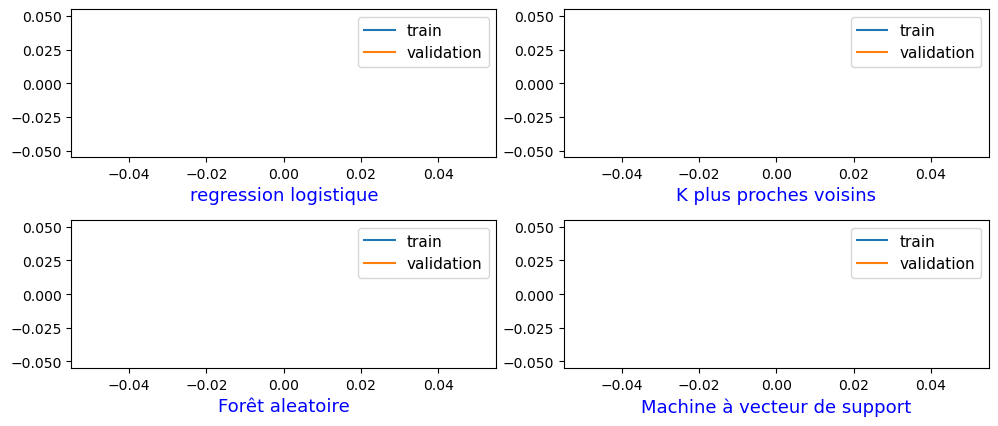

In [82]:
fig = plt.figure(figsize=(10,6))
plt.subplot(3,2,1)
N, train_score, val_score = learning_curve(LR_OP, X_train, y_train,
                                           train_sizes = np.linspace(0.01, 1.0, 25), cv = 5)

print(N)
plt.plot(N,train_score.mean(axis=1), label='train')
plt.plot(N,val_score.mean(axis=1), label='validation')
plt.xlabel('regression logistique', color = 'b', fontsize = 13)
plt.legend(fontsize = 11)

#plt.figure(figsize=(10,6))
plt.subplot(3,2,2)
N, train_score, val_score = learning_curve(KNN_OP, X_train, y_train,
                                           train_sizes = np.linspace(0.01, 1.0, 25), cv = 5)
print(N)
plt.plot(N,train_score.mean(axis=1), label='train')
plt.plot(N,val_score.mean(axis=1), label='validation')
plt.xlabel('K plus proches voisins', color = 'b', fontsize = 13)
plt.legend(fontsize = 11)

#plt.figure(figsize=(10,6))
plt.subplot(3,2,3)
N, train_score, val_score = learning_curve(RF_OP, X_train, y_train,
                                           train_sizes = np.linspace(0.01, 1.0, 25), cv = 5)
print(N)
plt.plot(N,train_score.mean(axis=1), label='train')
plt.plot(N,val_score.mean(axis=1), label='validation')
plt.xlabel('Forêt aleatoire', color = 'b', fontsize = 13)
plt.legend(fontsize = 11)

#plt.figure(figsize=(10,6))
plt.subplot(3,2,4)
N, train_score, val_score = learning_curve(MVS_OP, X_train, y_train,

                                           train_sizes = np.linspace(0.01, 1.0, 25), cv = 5)
print(N)
plt.plot(N,train_score.mean(axis=1), label='train')
plt.plot(N,val_score.mean(axis=1), label='validation')
plt.xlabel('Machine à vecteur de support', color = 'b', fontsize = 13)
plt.legend(fontsize = 11)

fig.tight_layout()

> 5. Définir une fonction d’évaluation vous permettant de calculer les différentes métriques dans le test set (20 pts). 

In [ ]:
def model(X, theta):
    """
    Implémente y = X * theta.
    
    Parameters:
    X (numpy.ndarray): Matrice des caractéristiques avec une colonne de biais de 1.
    theta (numpy.ndarray): Vecteur des paramètres.
    
    Returns:
    numpy.ndarray: Vecteur des prédictions.
    """
    return np.dot(X, theta)

# Exemple d'utilisation

# Générer des données aléatoires pour illustrer
np.random.seed(0)
age = np.random.randint(20, 70, size=497).reshape(-1, 1)
fev = np.random.rand(497).reshape(-1, 1) * 4

# Ajouter une colonne de biais (1) à la matrice des caractéristiques
X = np.concatenate((np.ones((age.shape[0], 1)), age), axis=1)

# Initialiser theta avec des coefficients aléatoires (2, 1)
theta = np.random.rand(2, 1)

# Utiliser la fonction model pour prédire les valeurs de y
y_pred = model(X_test, theta)

print("Matrice des caractéristiques X avec biais:\n", X[:5])  # Afficher les 5 premières lignes
print("Vecteur des paramètres theta:\n", theta)
print("Prédictions y:\n", y_pred[:5])  # Afficher les 5 premières prédictions


In [ ]:
fonction non_fonction(paramètres):
    var = fonction_taille_vecteur(y)
    retourner 1/m * X.T.dot(model(X, theta) - y)